In [1]:
import sqlite3
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
connection = sqlite3.connect('../../chembl_30.db')
cursor = connection.cursor()
#old_query = 'SELECT ASY.CHEMBL_ID, ASY.CELL_ID, ACT.STANDARD_VALUE,ACT.STANDARD_TYPE,ACT.STANDARD_UNITS FROM ASSAYS ASY, ACTIVITIES ACT WHERE ACT.ASSAY_ID = ASY.ASSAY_ID'
query = "SELECT ACT.ACTIVITY_ID, ASY.ASSAY_ID, ACT.MOLREGNO , ASY.CELL_ID, ACT.STANDARD_VALUE,ACT.STANDARD_UNITS, ACT.STANDARD_TYPE " \
    " FROM ACTIVITIES ACT INNER JOIN ASSAYS ASY ON ACT.ASSAY_ID = ASY.ASSAY_ID" \
    " WHERE ASY.CELL_ID IS NOT NULL"

In [3]:
cursor.execute(query)

In [4]:
activity_dictionary = cursor.fetchall()
#SELECT ACT.ACTIVITY_ID, ASY.ASSAY_ID, ACT.MOLREGNO , ASY.CELL_ID, ACT.STANDARD_VALUE,ACT.STANDARD_UNITS, ACT.STANDARD_TYPE 
activity_df = pd.DataFrame(activity_dictionary,columns=['activity_id','assay_id','compound_id','cell_id','std_value','std_units','std_type'])
activity_df

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type
0,161152,5,556,163,600000.0,nM,CC50
1,162404,5,82983,163,90000.0,nM,CC50
2,164804,5,1633207,163,340000.0,nM,CC50
3,166046,5,1633675,163,2400.0,nM,CC50
4,166057,5,47675,163,7000000.0,nM,CC50
...,...,...,...,...,...,...,...
5987118,23119972,2095877,2531656,594,50.0,nM,EC50
5987119,23119973,2095878,2531656,1213,190.0,nM,EC50
5987120,23119978,2095878,2537326,1213,18.0,µM,EC50
5987121,23119974,2095879,2531656,630,370.0,nM,EC50


In [5]:
raw_act = activity_df[activity_df['std_type'].isin(['IC50','CC50','EC50','GI50'])]
raw_act

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type
0,161152,5,556,163,600000.0,nM,CC50
1,162404,5,82983,163,90000.0,nM,CC50
2,164804,5,1633207,163,340000.0,nM,CC50
3,166046,5,1633675,163,2400.0,nM,CC50
4,166057,5,47675,163,7000000.0,nM,CC50
...,...,...,...,...,...,...,...
5987118,23119972,2095877,2531656,594,50.0,nM,EC50
5987119,23119973,2095878,2531656,1213,190.0,nM,EC50
5987120,23119978,2095878,2537326,1213,18.0,µM,EC50
5987121,23119974,2095879,2531656,630,370.0,nM,EC50


In [6]:
raw_act = raw_act[raw_act['std_units'].isin(['nM', '10^4M', '/uM', "10'-11uM", "10'10uM", "10'8pM", "10'7pM", "10'6pM", "10'5pM", "10'-4nM", "10'6uM", "10'5uM", 'µM'])]
raw_act

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type
0,161152,5,556,163,600000.0,nM,CC50
1,162404,5,82983,163,90000.0,nM,CC50
2,164804,5,1633207,163,340000.0,nM,CC50
3,166046,5,1633675,163,2400.0,nM,CC50
4,166057,5,47675,163,7000000.0,nM,CC50
...,...,...,...,...,...,...,...
5987118,23119972,2095877,2531656,594,50.0,nM,EC50
5987119,23119973,2095878,2531656,1213,190.0,nM,EC50
5987120,23119978,2095878,2537326,1213,18.0,µM,EC50
5987121,23119974,2095879,2531656,630,370.0,nM,EC50


In [7]:
#TRANSFORMACIONES A uM

# nM
raw_act.loc[ raw_act['std_units'] == 'nM',['std_value']] * 0.001
raw_act.loc[ raw_act['std_units'] == 'nM',['std_units']] = 'uM'

# 10^4M 
raw_act.loc[ raw_act['std_units'] == '10^4M',['std_value']] * 10**4
raw_act.loc[ raw_act['std_units'] == '10^4M',['std_value']] * 1000000
raw_act.loc[ raw_act['std_units'] == '10^4M',['std_units']] = 'uM'

# /uM 
raw_act.loc[ raw_act['std_units'] == '/uM',['std_units']] = 'uM'


# 10'-11uM 
raw_act.loc[ raw_act['std_units'] == "10'-11uM",['std_value']] * 10**-11
raw_act.loc[ raw_act['std_units'] == "10'-11uM",['std_units']] = 'uM'

# 10'10uM
raw_act.loc[ raw_act['std_units'] == "10'10uM",['std_value']] * 10**10
raw_act.loc[ raw_act['std_units'] == "10'10uM",['std_units']] = 'uM'

# 10'8pM  
raw_act.loc[ raw_act['std_units'] == "10'8pM",['std_value']] * 10**8
raw_act.loc[ raw_act['std_units'] == "10'8pM",['std_value']] * 0.000001
raw_act.loc[ raw_act['std_units'] == "10'8pM",['std_units']] = 'uM'

# 10'7pM
raw_act.loc[ raw_act['std_units'] == "10'7pM",['std_value']] * 10**7
raw_act.loc[ raw_act['std_units'] == "10'7pM",['std_value']] * 0.000001
raw_act.loc[ raw_act['std_units'] == "10'7pM",['std_units']] = 'uM'

#[   "10'5uM", 'µM']

# 10'6pM 
raw_act.loc[ raw_act['std_units'] == "10'6pM",['std_value']] * 10**6
raw_act.loc[ raw_act['std_units'] == "10'6pM",['std_value']] * 0.000001
raw_act.loc[ raw_act['std_units'] == "10'6pM",['std_units']] = 'uM'

# 10'5pM    
raw_act.loc[ raw_act['std_units'] == "10'5pM",['std_value']] * 10**5
raw_act.loc[ raw_act['std_units'] == "10'5pM",['std_value']] * 0.000001
raw_act.loc[ raw_act['std_units'] == "10'5pM",['std_units']] = 'uM'

# 10'-4nM  
raw_act.loc[ raw_act['std_units'] == "10'-4nM",['std_value']] * 10**-4
raw_act.loc[ raw_act['std_units'] == "10'-4nM",['std_value']] * 0.001
raw_act.loc[ raw_act['std_units'] == "10'-4nM",['std_units']] = 'uM'


# 10'6uM  
raw_act.loc[ raw_act['std_units'] == "10'6uM",['std_value']] * 10**6
raw_act.loc[ raw_act['std_units'] == "10'6uM",['std_units']] = 'uM'

# 10'5uM
raw_act.loc[ raw_act['std_units'] == "10'5uM",['std_value']] * 10**5
raw_act.loc[ raw_act['std_units'] == "10'5uM",['std_units']] = 'uM'

# µM 
raw_act.loc[ raw_act['std_units'] == "µM",['std_units']] = 'uM'

In [8]:
raw_act

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type
0,161152,5,556,163,600000.0,uM,CC50
1,162404,5,82983,163,90000.0,uM,CC50
2,164804,5,1633207,163,340000.0,uM,CC50
3,166046,5,1633675,163,2400.0,uM,CC50
4,166057,5,47675,163,7000000.0,uM,CC50
...,...,...,...,...,...,...,...
5987118,23119972,2095877,2531656,594,50.0,uM,EC50
5987119,23119973,2095878,2531656,1213,190.0,uM,EC50
5987120,23119978,2095878,2537326,1213,18.0,uM,EC50
5987121,23119974,2095879,2531656,630,370.0,uM,EC50


In [9]:
raw_act['active']= np.where(raw_act['std_value']<=10.0,1,-1)

C:\Users\Ramses\AppData\Local\Temp\ipykernel_7988\191682871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_act['active']= np.where(raw_act['std_value']<=10.0,1,-1)


In [10]:
raw_act

,activity_id,assay_id,compound_id,cell_id,std_value,std_units,std_type,active
0,161152,5,556,163,600000.0,uM,CC50,-1
1,162404,5,82983,163,90000.0,uM,CC50,-1
2,164804,5,1633207,163,340000.0,uM,CC50,-1
3,166046,5,1633675,163,2400.0,uM,CC50,-1
4,166057,5,47675,163,7000000.0,uM,CC50,-1
...,...,...,...,...,...,...,...,...
5987118,23119972,2095877,2531656,594,50.0,uM,EC50,-1
5987119,23119973,2095878,2531656,1213,190.0,uM,EC50,-1
5987120,23119978,2095878,2537326,1213,18.0,uM,EC50,-1
5987121,23119974,2095879,2531656,630,370.0,uM,EC50,-1


In [11]:
raw_act.to_csv('raw_activity_30.csv',header=True,index=True)

In [12]:
act = pd.DataFrame(raw_act[['compound_id','cell_id','active']])
act

,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5987118,2531656,594,-1
5987119,2531656,1213,-1
5987120,2537326,1213,-1
5987121,2531656,630,-1


In [13]:
#act.drop_duplicates()
act.to_csv('summary30.csv',header=True,index=True)

In [14]:
act=pd.read_csv('summary30.csv',index_col=0).drop_duplicates(keep='first')


In [15]:
df_count = act.groupby(by=['compound_id','cell_id'])
df_count.size()

compound_id  cell_id
10           5566       1
23           330        1
             555        1
38           5566       1
39           5566       1
                       ..
2537375      5673       1
2537376      303        1
             646        1
             721        1
             786        1
Length: 3376048, dtype: int64

In [16]:
df_count.size()[df_count.size()==1]

compound_id  cell_id
10           5566       1
23           330        1
             555        1
38           5566       1
39           5566       1
                       ..
2537375      5673       1
2537376      303        1
             646        1
             721        1
             786        1
Length: 3359808, dtype: int64

In [17]:
index1 = pd.MultiIndex.from_arrays([act[col] for col in ['compound_id', 'cell_id']])
index2 = df_count.size()[df_count.size()==1].index

In [18]:
summ_act=act.loc[index1.isin(index2)]
summ_act


,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5987118,2531656,594,-1
5987119,2531656,1213,-1
5987120,2537326,1213,-1
5987121,2531656,630,-1


In [19]:
summ_act.to_csv('act_summary30.csv',header=True,index=True)

In [20]:
#Conteo de -1 y 1 

size = summ_act.shape[0]
print (len(summ_act[summ_act['active'].isin([1])])/size)
print (len(summ_act[summ_act['active'].isin([-1])])/size)

0.0208723236565899
0.9791276763434101


SUMMARY

In [21]:
summary = pd.read_csv('act_summary30.csv',index_col=0)
summary

,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5987118,2531656,594,-1
5987119,2531656,1213,-1
5987120,2537326,1213,-1
5987121,2531656,630,-1


In [22]:
#cells that report activities and inactivities
cell_in_act = summary.groupby(by=['cell_id','active']).size().groupby(by=['cell_id']).size()[summary.groupby(by=['cell_id','active']).size().groupby(by=['cell_id']).size()==2].index
summary[summary['cell_id'].isin(cell_in_act)]

,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5987118,2531656,594,-1
5987119,2531656,1213,-1
5987120,2537326,1213,-1
5987121,2531656,630,-1


In [23]:
b_summary_cell = summary[summary['cell_id'].isin(cell_in_act)]
b_summary_cell

,compound_id,cell_id,active
0,556,163,-1
1,82983,163,-1
2,1633207,163,-1
3,1633675,163,-1
4,47675,163,-1
...,...,...,...
5987118,2531656,594,-1
5987119,2531656,1213,-1
5987120,2537326,1213,-1
5987121,2531656,630,-1


In [24]:
b_summary_cell.groupby(by=['cell_id']).size().max()

84413

In [25]:
b_summary_cell.groupby(by=['cell_id']).size().min()

2

In [26]:
#count_in_act_cell = b_summary.groupby(by=['cell_id','active']).size()
count_in_act_cell = b_summary_cell.groupby(by=['cell_id','active'])
count_in_act_cell

In [27]:
x_cell=count_in_act_cell['active'].size().values
x_cell

array([10, 13,  7, ..., 11, 76,  2], dtype=int64)

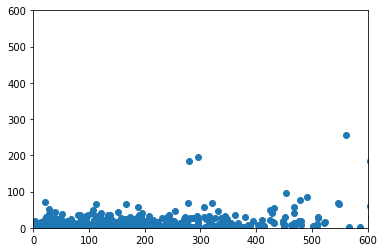

In [28]:
z_cell=x_cell[::2]
w_cell=x_cell[1::2]
plt.xlim(0,600)
plt.ylim(0,600)
plt.scatter(x=z_cell,y=w_cell)
plt.show()